In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
df=pd.read_csv('/content/Global_warming_co2_pop_data.csv',index_col='Sum of co2_per_capita')
df=df.dropna()  # remove nanvalue
df.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,...,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.00000
mean,10.330696,10.050709,9.864109,10.150517,10.032813,9.903665,10.008509,10.061843,9.455835,9.560078,...,10.687883,10.703530,10.470561,10.473617,10.383343,10.221291,10.215943,10.187622,10.292352,9.51237
std,78.239089,76.146281,74.846941,77.065176,76.191463,75.210776,75.997500,76.428397,71.798373,72.561537,...,81.174658,81.309482,79.517617,79.569290,78.891892,77.655514,77.609811,77.392692,78.208479,72.30260
min,0.038000,0.043000,0.038000,0.039000,0.024000,0.040000,0.040000,0.041000,0.037000,0.029000,...,0.036000,0.034000,0.026000,0.028000,0.037000,0.026000,0.030000,0.033000,0.031000,0.02800
25%,0.513750,0.536750,0.584500,0.574250,0.579500,0.661000,0.644750,0.672500,0.697500,0.718000,...,0.892000,0.928750,0.970000,0.891500,0.954500,1.026500,0.970250,1.012750,1.078250,0.98925
50%,2.813000,2.696000,2.835000,2.770500,2.836000,2.875000,2.971500,2.962500,2.838500,3.068500,...,3.677500,3.708500,3.630000,3.569000,3.603000,3.442000,3.595500,3.585000,3.766000,3.45150
75%,8.007250,7.648500,7.488500,7.522000,7.559750,7.693750,7.623500,7.420250,7.251750,7.883750,...,7.569500,7.517250,7.394250,7.346250,7.226250,6.976000,7.016250,6.995250,7.200000,6.52350
max,1188.030000,1156.189000,1136.039000,1169.095000,1155.775000,1141.005000,1153.095000,1159.246000,1089.547000,1101.468000,...,1232.775000,1234.721000,1207.772000,1208.401000,1198.059000,1179.552000,1178.996000,1175.716000,1187.849000,1098.08300


In [ ]:
#find all coountries in the dataframe
# list(df.index)


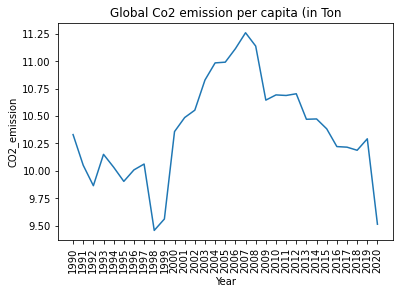

In [12]:
summ=df.describe()
plt.plot(summ[1:2].T)
plt.xticks(rotation ='vertical')
plt.xlabel('Year')
plt.ylabel('CO2_emission')
plt.title('Global Co2 emission per capita (in Ton')
plt.show()

In [9]:
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894


In [13]:
# df.info()
X_std = StandardScaler().fit_transform(df)
print(X_std.shape)  # shape of standardized data   


(230, 31)


In [14]:
pca=PCA()
pca.fit(X_std)   # fitting pca
pca.explained_variance_ratio_
cum_ratios=pca.explained_variance_ratio_.cumsum()

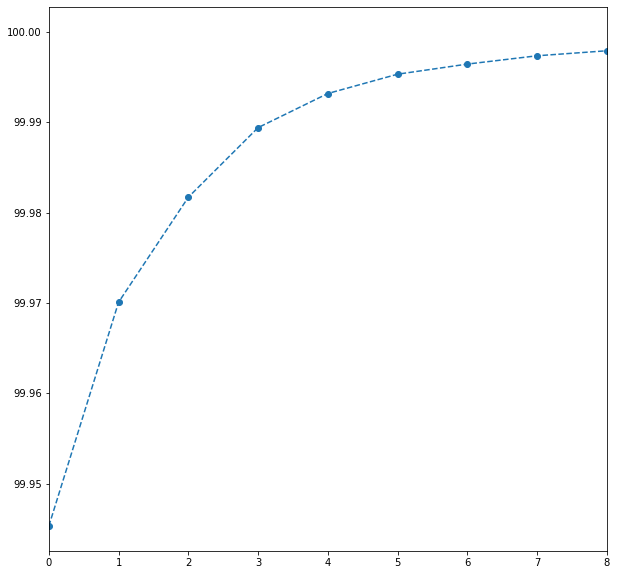

In [15]:
plt.figure(figsize=(10,10))
plt.plot(range(len(cum_ratios)),cum_ratios*100,marker='o',linestyle='--')
plt.xlim(0,8)
plt.show()

In [16]:
pca=PCA(n_components=3)
pca.fit(X_std)

PCA(n_components=3)

We need only the calculated resulting components scores for the elements in our data set:

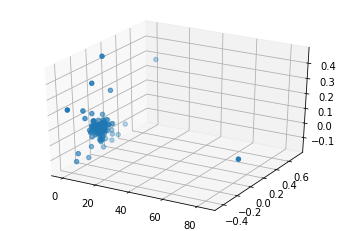

In [17]:
from mpl_toolkits import mplot3d
score_pca=pca.transform(X_std)
score_pca[0]
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(score_pca[:,0],score_pca[:,1],score_pca[:,2]);

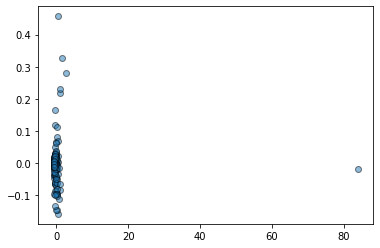

In [18]:
#scatter plot
plt.scatter(score_pca[:, 0], score_pca[:, 2],alpha=0.5,edgecolors='#000000') 
# plt.axis('equal');
plt.show()

Text(0, 0.5, 'Proportion of Variance Explained')

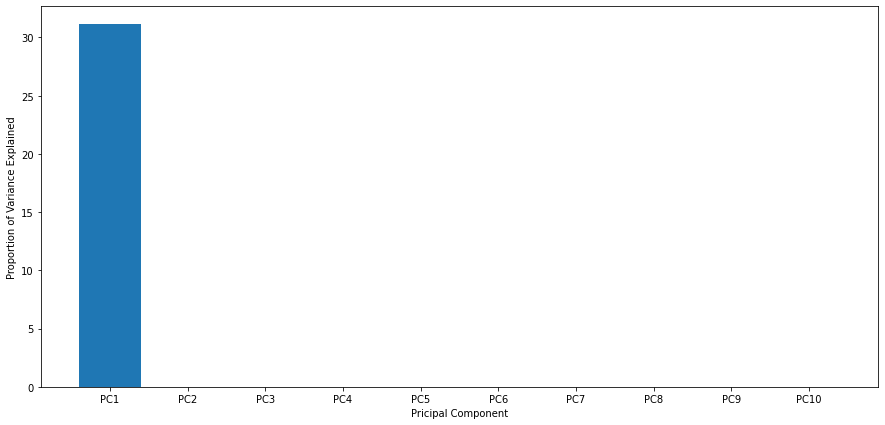

In [19]:
pca=PCA()
pca.fit(X_std)


var = pca.explained_variance_[0:10] #percentage of variance explained
labels = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']
plt.figure(figsize=(15,7))
plt.bar(labels,var,)
plt.xlabel('Pricipal Component')
plt.ylabel('Proportion of Variance Explained')

In [20]:
# let's check K_means for PCA dataa
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [21]:
kmeans = KMeans(
      init="random",
      n_clusters=3,
      n_init=10,
      max_iter=300,
      random_state=42
      )

In [23]:
score_pca=pca.transform(X_std)
kmeans.fit(score_pca)
kmeans.inertia_    #Statistics from the initialization run with lowest SSE

22.21747237714733

In [24]:
 # Final locations of the centroid
 print(kmeans.cluster_centers_)
np.shape(kmeans.cluster_centers_)



[[ 8.39707854e+01 -3.47259132e-02 -2.00006274e-02 -2.05661081e-03
  -1.03741461e-02 -1.73301940e-03 -3.49809113e-03 -2.85236342e-03
   2.43768592e-03  8.94470459e-04  1.68629480e-05  9.62013787e-04
   1.86100925e-03 -1.18326090e-03 -3.39790206e-04 -6.23671227e-04
   4.83525490e-05  8.47348176e-05 -6.04533709e-04 -3.59956469e-04
  -1.76571116e-04 -6.83879927e-05  3.82164339e-04  2.84063869e-04
  -2.86127268e-05 -1.43535968e-04  6.43960327e-06  1.52400975e-04
   1.00931201e-04  4.20036377e-05  1.80596195e-04]
 [-5.57726932e-01 -8.75531174e-03 -2.65684829e-03 -4.02488843e-03
  -8.86642959e-04 -5.54879593e-04 -1.62413124e-03 -2.54298216e-04
   5.18150285e-04  1.19578147e-04  3.79761696e-04 -2.93324356e-04
   8.29477741e-04 -2.61347712e-04  7.42144549e-05 -8.66527433e-04
  -1.58344839e-04 -2.60800686e-04 -1.98500148e-04 -1.60373733e-04
  -1.69672173e-04 -2.94652962e-05  2.24421080e-04 -2.25262649e-06
  -2.12689279e-05  3.24473205e-05  1.35217452e-05  8.78115475e-05
   2.12858615e-05  5.0624

(3, 31)

In [25]:
# The number of iterations required to converge and lables

kmeans.n_iter_
cluster_data=kmeans.labels_[:]
df['cluster_data']=cluster_data
df.head(5)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,cluster_data
Sum of co2_per_capita,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.210,0.182,0.095,0.084,0.075,0.068,0.062,0.056,0.052,0.040,...,0.328,0.262,0.233,0.230,0.191,0.189,0.224,0.319,0.312,1
Africa,1.052,1.068,1.010,1.043,1.029,1.077,1.066,1.079,1.085,1.050,...,1.146,1.123,1.184,1.119,1.119,1.113,1.086,1.077,0.990,1
Albania,1.657,1.289,0.769,0.725,0.608,0.664,0.643,0.494,0.561,0.953,...,1.602,1.697,1.941,1.555,1.556,1.838,1.642,1.688,1.576,1
Algeria,2.979,2.985,2.956,2.965,3.053,3.303,3.307,2.925,3.531,2.993,...,3.427,3.472,3.662,3.768,3.673,3.743,3.824,3.871,3.535,1
Andorra,7.461,7.177,6.907,6.730,6.489,6.656,7.059,7.235,7.655,7.969,...,5.912,5.897,5.828,5.966,6.068,6.044,6.423,6.505,6.035,1


In [26]:
df.loc['South Korea']

1990             5.836
1991             6.356
1992             6.842
1993             7.450
1994             7.939
1995             8.472
1996             9.204
1997             9.637
1998             8.118
1999             8.741
2000             9.298
2001             9.564
2002             9.933
2003            10.069
2004            10.151
2005            10.258
2006            10.321
2007            10.664
2008            10.858
2009            10.927
2010            12.021
2011            12.545
2012            12.564
2013            12.628
2014            12.460
2015            12.498
2016            12.539
2017            12.834
2018            13.125
2019            12.650
2020            11.656
cluster_data     2.000
Name: South Korea, dtype: float64

In [ ]:
len(df[df['cluster_data']==0]),len(df[df['cluster_data']==1]), len(df[df['cluster_data']==2])

(1, 173, 56)

In our data set we don't have three letter ISO countries code 
I am presenting here an example of how to plot the data in map using python

In [56]:
#https://plotly.com/python/choropleth-maps/
df = px.data.gapminder().query("year==2007")
fig = px.choropleth(df, locations="iso_alpha",
                    color="lifeExp", # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [55]:
df1

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894
